<a href="https://colab.research.google.com/github/joaogabrielanuto/Laboratorio-de-Codigos/blob/main/Estrategia_drawdown_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install vectorbt

In [ ]:
import numpy as np
import yfinance as yf
import vectorbt as vbt

Parametros:

* 1 passo: identificar o último topo historico (TH)
* 2 passo: checar se ele já voltou 15% do TH
* 3 passo: identificar os topos históricos desde o IPO
* 4 passo: drawdown médio(mediano) dos últimos topos


In [ ]:
tickers = ['ABEV3.SA']

ativo_data = vbt.YFData.download(tickers, start='2007-01-01').get('Close')

In [ ]:
portfolios = vbt.Portfolio.from_holding(ativo_data, init_cash=ativo_data.iloc[0])
portfolios.drawdowns.plot(top_n=1000).show()

In [ ]:
drawdowns_data = portfolios.get_drawdowns()
tab_draw = drawdowns_data.records
tab_draw['Drawdown'] = (1 - tab_draw.valley_val/tab_draw.peak_val)*100
print('Foram calculados',tab_draw.id.count(),'drawdowns para este ativo')
tab_draw.head()

Foram calculados 106 drawdowns para este ativo


,id,col,peak_idx,start_idx,valley_idx,end_idx,peak_val,valley_val,end_val,status,Drawdown
0,0,0,0,1,3,8,2.331447,2.276208,2.373313,1,2.369269
1,1,0,9,10,10,11,2.390607,2.385672,2.405384,1,0.206434
2,2,0,11,12,13,14,2.405384,2.368402,2.410318,1,1.537460
3,3,0,14,15,15,16,2.410318,2.409849,2.434989,1,0.019457
4,4,0,16,17,18,30,2.434989,2.353600,2.449817,1,3.342496


Definir o percentual mínimo para ser considerado um drawdown

Atualmente 15%

In [ ]:
perc_min_drawdown = 15

In [ ]:
filtro_draw = tab_draw[tab_draw['Drawdown']>=perc_min_drawdown]
filtro_draw

,id,col,peak_idx,start_idx,valley_idx,end_idx,peak_val,valley_val,end_val,status,Drawdown
19,19,0,113,114,155,192,3.498329,2.837149,3.500795,1,18.899875
22,22,0,208,209,450,684,3.517818,1.831566,3.534226,1,47.934614
43,43,0,990,991,1016,1072,5.833481,4.783694,5.871864,1,17.995893
44,44,0,1075,1076,1138,1187,6.394413,5.081587,6.470171,1,20.530837
70,70,0,1499,1500,1593,1805,13.012874,10.889916,13.097234,1,16.314285
88,88,0,2167,2168,2235,2379,16.675171,13.419185,16.704042,1,19.525954
89,89,0,2381,2382,2468,2562,16.796186,13.548644,16.931362,1,19.334998
105,105,0,2777,2778,3272,3887,21.439585,10.293192,15.550000,0,51.989779


In [ ]:
filtro_draw['Drawdown'].median()

19.430476245279287

In [ ]:
drawdowns_operados = tab_draw[tab_draw.Drawdown>=filtro_draw['Drawdown'].median()]
drawdowns_operados

,id,col,peak_idx,start_idx,valley_idx,end_idx,peak_val,valley_val,end_val,status,Drawdown
22,22,0,208,209,450,684,3.517818,1.831566,3.534226,1,47.934614
44,44,0,1075,1076,1138,1187,6.394413,5.081587,6.470171,1,20.530837
88,88,0,2167,2168,2235,2379,16.675171,13.419185,16.704042,1,19.525954
105,105,0,2777,2778,3272,3887,21.439585,10.293192,15.550000,0,51.989779


In [ ]:
ls_preco_compras = []
ls_dias_compras = []

for i in drawdowns_operados.peak_idx:
  preco_compra = ativo_data.iloc[i]*((100-filtro_draw['Drawdown'].median())/100)
  dia_pico = ativo_data.index[i]
  dia_compra = ativo_data[(ativo_data<=preco_compra) & (ativo_data.index>=dia_pico)].index[0]
  ls_preco_compras.append(preco_compra)
  ls_dias_compras.append(dia_compra)

In [ ]:
drawdowns_operados['Lista_compras'] = ls_preco_compras
drawdowns_operados['Lista_vendas'] = drawdowns_operados.peak_val.shift(-1)
drawdowns_operados['Retorno'] = (drawdowns_operados.Lista_vendas/drawdowns_operados.Lista_compras - 1)*100
drawdowns_operados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,id,col,peak_idx,start_idx,valley_idx,end_idx,peak_val,valley_val,end_val,status,Drawdown,Lista_compras,Lista_vendas,Retorno
22,22,0,208,209,450,684,3.517818,1.831566,3.534226,1,47.934614,2.834290,6.394413,125.609039
44,44,0,1075,1076,1138,1187,6.394413,5.081587,6.470171,1,20.530837,5.151948,16.675171,223.667268
88,88,0,2167,2168,2235,2379,16.675171,13.419185,16.704042,1,19.525954,13.435106,21.439585,59.578831
105,105,0,2777,2778,3272,3887,21.439585,10.293192,15.550000,0,51.989779,17.273771,NaN,NaN


In [ ]:
retorno_mediano = drawdowns_operados['Retorno'].median()
retorno_mediano

125.60903915168807

In [ ]:
ls_preco_compras

[2.834289572468169, 5.151948480671209, 13.435105778156876, 17.27377131360706]

In [ ]:
ls_preco_vendas = []

for i in ls_preco_compras:
  preco_venda = i*(retorno_mediano/100+1)
  ls_preco_vendas.append(preco_venda)

In [ ]:
ls_preco_compras

[2.834289572468169, 5.151948480671209, 13.435105778156876, 17.27377131360706]

In [ ]:
ls_preco_vendas

[6.394413471221924, 11.623261464832305, 30.31081305511265, 38.971189485888814]

In [ ]:
ls_preco_vendas = []
ls_dias_vendas = []

for i in ls_preco_compras:
  dia_venda = ativo_data[(ativo_data<=preco_compra) & (ativo_data.index>=dia_pico)].index[0]
  preco_venda = ativo_data[(ativo_data<=preco_compra) & (ativo_data.index>=dia_pico)].index[0]
  dia_compra = ativo_data[(ativo_data<=preco_compra) & (ativo_data.index>=dia_pico)].index[0]
  ls_preco_compras.append(preco_compra)
  ls_dias_compras.append(dia_compra)

[Timestamp('2008-01-17 00:00:00+0000', tz='UTC'),
 Timestamp('2011-08-04 00:00:00+0000', tz='UTC'),
 Timestamp('2016-01-18 00:00:00+0000', tz='UTC'),
 Timestamp('2018-06-06 00:00:00+0000', tz='UTC')]

In [ ]:
retorno_acm_carteira = (1+retorno_portfolio).cumprod()

In [ ]:
ls_preco_vendas = []
ls_dias_vendas = []

for i in drawdowns_operados.peak_idx:
  preco_venda = ativo_data.iloc[i]*((100-filtro_draw['Drawdown'].median())/100)
  dia_pico = ativo_data.index[i]
  dia_compra = ativo_data[(ativo_data<=preco_compra) & (ativo_data.index>=dia_pico)].index[0]
  ls_preco_compras.append(preco_compra)
  ls_dias_compras.append(dia_compra)

In [ ]:
drawdowns_operados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,id,col,peak_idx,start_idx,valley_idx,end_idx,peak_val,valley_val,end_val,status,Drawdown,Lista_compras,Lista_vendas,Retorno
22,22,0,208,209,450,684,3.517818,1.831566,3.534226,1,0.479346,2.834290,6.394412,125.608969
44,44,0,1075,1076,1138,1187,6.394412,5.081586,6.470170,1,0.205308,5.151947,16.675171,223.667360
88,88,0,2167,2168,2235,2379,16.675171,13.419185,16.704041,1,0.195260,13.435106,21.439583,59.578815
105,105,0,2777,2778,3272,3887,21.439583,10.293192,15.580000,0,0.519898,17.273770,NaN,NaN


In [ ]:
drawdowns_operados.Retorno.median()

125.60896878210545

In [ ]:
ls_preco_compras

[2.834289611087693, 5.151947014129009, 13.435105961221229, 17.273770012234657]

In [ ]:
ls_dias_compras

[Timestamp('2008-01-17 00:00:00+0000', tz='UTC'),
 Timestamp('2011-08-04 00:00:00+0000', tz='UTC'),
 Timestamp('2016-01-18 00:00:00+0000', tz='UTC'),
 Timestamp('2018-06-06 00:00:00+0000', tz='UTC')]

In [ ]:
portfolios.drawdowns.plot(top_n=4).show()

In [ ]:
preco_compra=2.81

In [ ]:
ativo_data[ativo_data>=preco_compra].index[0]

Timestamp('2007-04-19 00:00:00+0000', tz='UTC')

In [ ]:
entradas = ativo_data.iloc[208]*0.81
saidas = 500

In [ ]:
data_1pico = ativo_data.index[drawdowns_operados.peak_idx.iloc[0]]
data_1vale = ativo_data.index[drawdowns_operados.valley_idx.iloc[0]]
data_recuperacao = ativo_data.index[drawdowns_operados.valley_idx.iloc[0]]

In [ ]:
print(data_1pico)
print(data_1vale)
print(data_recuperacao)

2007-11-01 00:00:00+00:00
2008-10-27 00:00:00+00:00
2008-10-27 00:00:00+00:00


In [ ]:
ativo_data.head()

Date
2007-01-02 00:00:00+00:00    2.331446
2007-01-03 00:00:00+00:00    2.319061
2007-01-04 00:00:00+00:00    2.319061
2007-01-05 00:00:00+00:00    2.276208
2007-01-08 00:00:00+00:00    2.316545
Name: Close, dtype: float64

In [ ]:
lista_compras

[2.849432945251465, 5.1794733667373665, 13.506888427734376, 17.366062088012697]

In [ ]:
portfolios.drawdowns.plot(top_n=6).show()

In [ ]:
portfolio_signal = vbt.Portfolio.from_signals(ativo_data, entradas, saidas, direction='longonly')

In [ ]:
portfolio_signal.plot().show()

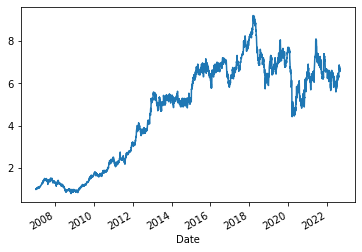

In [ ]:
(ativo_data.pct_change()+1).cumprod().plot()

In [ ]:
portfolio_signal.returns_acc().record

AttributeError: ignored

In [ ]:
drawdowns_data.avg_drawdown()

-0.08652067370645347

In [ ]:
drawdowns_data

In [ ]:
drawdowns_data.max_drawdown()

-0.9014475850987852

In [ ]:
drawdowns_data.count()

31

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(drawdowns_data.count)

ValueError: ignored

In [ ]:
type(drawdowns_data)

vectorbt.generic.drawdowns.Drawdowns